# Info Parameters

## Packgages

In [1]:
import sqlite3
import pandas as pd
import re
from unidecode import unidecode
import matplotlib.pyplot as plt

## Code (functions)

In [2]:
def normalize_parameter_name(parameter):
    """
    Normalize and clean a parameter name for uniformity and better processing.

    This function takes a parameter name as input and performs the following operations:
    1. Normalizes special characters to their basic ASCII form using the `unidecode` function.
    2. Converts the parameter name to lowercase.
    3. Removes trailing "s" characters from the end of words.
    4. Removes hyphens ("-") and spaces from the parameter name.
    5. Removes any non-alphanumeric characters from the parameter name.

    Parameters:
    parameter (str): The input parameter name to be normalized.

    Returns:
    str: The normalized and cleaned parameter name.

    Example:
    >>> normalize_parameter_name("t1/2 and t ½")
    't12andt12'
    >>> normalize_parameter_name("Example-Parameter-s")
    'exampleparameter'
    """
    # Normalize special characters and convert to lowercase
    normalized = unidecode(parameter).lower()
    
    # Remove trailing "s" characters from the end of words
    normalized = normalized.rstrip("s")
    
    # Remove hyphens and spaces
    normalized = normalized.replace("-", "").replace(" ", "")
    
    # Remove non-alphanumeric characters
    normalized = re.sub(r'[^a-zA-Z0-9]', '', normalized)
    
    return normalized


In [45]:
def get_unique_parameters_and_percentages(db_file):
    """
    Retrieve unique parameters and their occurrence percentages from an SQLite database.

    This function connects to an SQLite database specified by the 'db_file' parameter, retrieves the names of all tables
    in the database, and then extracts unique parameter names and their corresponding occurrence percentages. It also
    normalizes the parameter names using the 'normalize_parameter_name' function before processing.

    Parameters:
    db_file (str): The path to the SQLite database file.

    Returns:
    tuple: A tuple containing the number of unique parameters and a Pandas Series with parameter occurrence percentages.

    Example:
    >>> num_params, param_percentages = get_unique_parameters_and_percentages("my_database.db")
    >>> print(f"Number of unique parameters: {num_params}")
    >>> print("Parameter occurrence percentages:")
    >>> print(param_percentages)
    """
    # Connect to the SQLite database
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Get the names of all tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_names = cursor.fetchall()

    # List to store unique parameters
    
    unique_parameters = []
    # Iterate through each table and extract unique parameters
    for table in table_names:
        table_name = table[0]
        query = f"""SELECT DISTINCT Parameter FROM "{table_name}";"""
        df = pd.read_sql_query(query, conn)
        
        # Normalize and add parameters to the list
        normalized_parameters = df["Parameter"].apply(normalize_parameter_name).unique()
        unique_parameters.extend(normalized_parameters.tolist())

    valores_unicos=list(set(unique_parameters))
    # Calculate the number of unique parameters
    
    unique_parameters = update_parameters_with_synonym_groups(unique_parameters, synonym_groups)
    # Calculate the percentage of drugs that include each parameter
    parameter_counts = pd.Series(unique_parameters).value_counts()
    parameter_percentages = (parameter_counts)

    # Close the database connection
    conn.close()

    return parameter_percentages,valores_unicos


In [4]:
synonym_groups = {
  'halflife': [
        'halflife',
        'eliminationhalflife',
        't12',
        'terminalhalflife',
        'terminalhalflifet12',
        'halflive',
        't12beta',
        't12alpha',
        'halflifet12',
        'biologicalhalflife',
        'eliminationt12',
        'eliminationhalflife',
        'eliminationhalflifet12',
        'eliminationhalflive',
        'terminalhalflifet12',
        'terminaleliminationhalflifet12',
        'terminalplasmahalflife',
        'apparentterminalhalflife',
        'serumeliminationhalflife',
        'plasmahalflifet12',
        'plasmahalflife'
    ],
    'cmax': [
    'cmax',
    'maximumconcentration',
    'peakplasmaconcentration',
    'maximumplasmaconcentration',
    'peakplasmalevel',
    'peakconcentration',
    'maximalplasmaconcentration',
    'maximalconcentration',
    'maximalplasmaconcentrationscmax',
    'troughconcentration',
    'plasmacmax',
    'maximumplasmaconcentrationcmax',
    'maximalplasmaconcentrationcmax',
    'ctrough',
    'troughplasmaconcentration'
    ],
    'timetocmax': [
      'timetomaximumplasmaconcentration',
    'timetomaximumconcentration',
    'timetocmax',
    'timetocmaxtmax',
    'timetopeakplasmaconcentration',
    'timetopeakconcentration',
    'timetoreachcmaxtmax',
    'peaktime'

    ],
    'cssmax': [
      'steady-stateplasmaconcentration',
    'cssmax',
    'steadystateplasmaconcentration'
    ],
    
    'auc': [
      'auc',
    'auc0infinity',
    'auc0t',
    'auc0',
    'aucratio',
    'auc024',
    'auc024h',
    'areaunderthecurve',
    'areaundertheconcentrationtimecurve',
    'areaundertheplasmaconcentrationtimecurve',
    'areaundertheplasmaconcentrationtimecurveauc',
    'areaunderthecurveauc',
    'auclast',
    'aucinf',
    'auc012h',
    'auct',
    'aucinfinity',
    'auc08',
    'auc048'
    ],
    'clearance': [
      'clearance',
    'totalbodyclearance',
    'plasmaclearance',
    'systemicclearance',
    'apparentclearance',
    'apparentoralclearance',
    'clearancerate',
    'renalclearance',
    'totalclearance',
    'excretion',
    'eliminationrateconstant',
    'totalbodyclearancecl',
    'renalclearanceclr',
    'clearanceclf',
    'metabolicclearance',
    'bloodclearance',
    'hepaticclearance',
    'eliminationclearance',
    'metabolicclearancerate',
    'absorptionrateconstantka',
    'nonrenalclearance',
    'plasmaclearancecl'
    ],
    
    'bioavailability': [
      'bioavailability',
    'absolutebioavailability',
    'oralbioavailability',
    'relativebioavailability',
    'systemicavailability',
    'absoluteoralbioavailability',
    'biologicalavailability',
    'bioavailabilitie',
    'bioavailabilities',
    'relativebioavailabilitie',
    'bioavailabilityf',
    'absolutebioavailabilitie',
    'relativeoralbioavailability',
    'bioavailable'
    ],
    
    'maximaltolerateddose': [
      'mtd',
    'maximaltolerateddose'
    ]

}



In [5]:
def update_parameters_with_synonym_groups(unique_params, synonym_groups):
    updated_params = []
    for param in unique_params:
        for group, synonyms in synonym_groups.items():
            if param in synonyms:
                updated_params.append(group)
                break
        else:
            updated_params.append(param)
    return updated_params

## Main

In [46]:
if __name__ == "__main__":
    """
    Main script that analyzes drug data and visualizes parameter statistics.
    
    This script serves as the main entry point for the analysis and visualization of drug data.
    It retrieves the parameter occurrence percentages from a specified SQLite database file,
    then prints the percentages, generates a bar plot to visualize the distribution, and saves the percentages to a CSV file.
    
    Note: Replace 'DRUG_DBreducida.db' with the path to your SQLite database.

    Parameters:
    None

    Returns:
    None
    """
    # Specify the path to the SQLite database file
    db_file = "DRUG_DB.db"  # Replace with the path to your SQLite database
    valores_unicos = []
    # Retrieve parameter percentages using the 'get_unique_parameters_and_percentages' function
    parameter_percentages, valores_unicos = get_unique_parameters_and_percentages(db_file)



    # Eliminar duplicados de la lista actualizada
    valores_unicos = list(set(valores_unicos))

    # Imprimir resultados actualizados
    print(f"Número de parámetros únicos: {len(parameter_percentages)}")
    print("Porcentaje de fármacos que incluyen cada parámetro único:")
    print(parameter_percentages)
    

   

Número de parámetros únicos: 18044
Porcentaje de fármacos que incluyen cada parámetro único:
halflife                                    5423
clearance                                   3496
auc                                         3218
cmax                                        2940
bioavailability                             2505
                                            ... 
timetopeakbrac                                 1
areaunderthebloodethanoltimecurveauc           1
betaphaseconstant                              1
fractionofmetabolism                           1
areaundertheplasmadrugconcentrationcurve       1
Length: 18044, dtype: int64


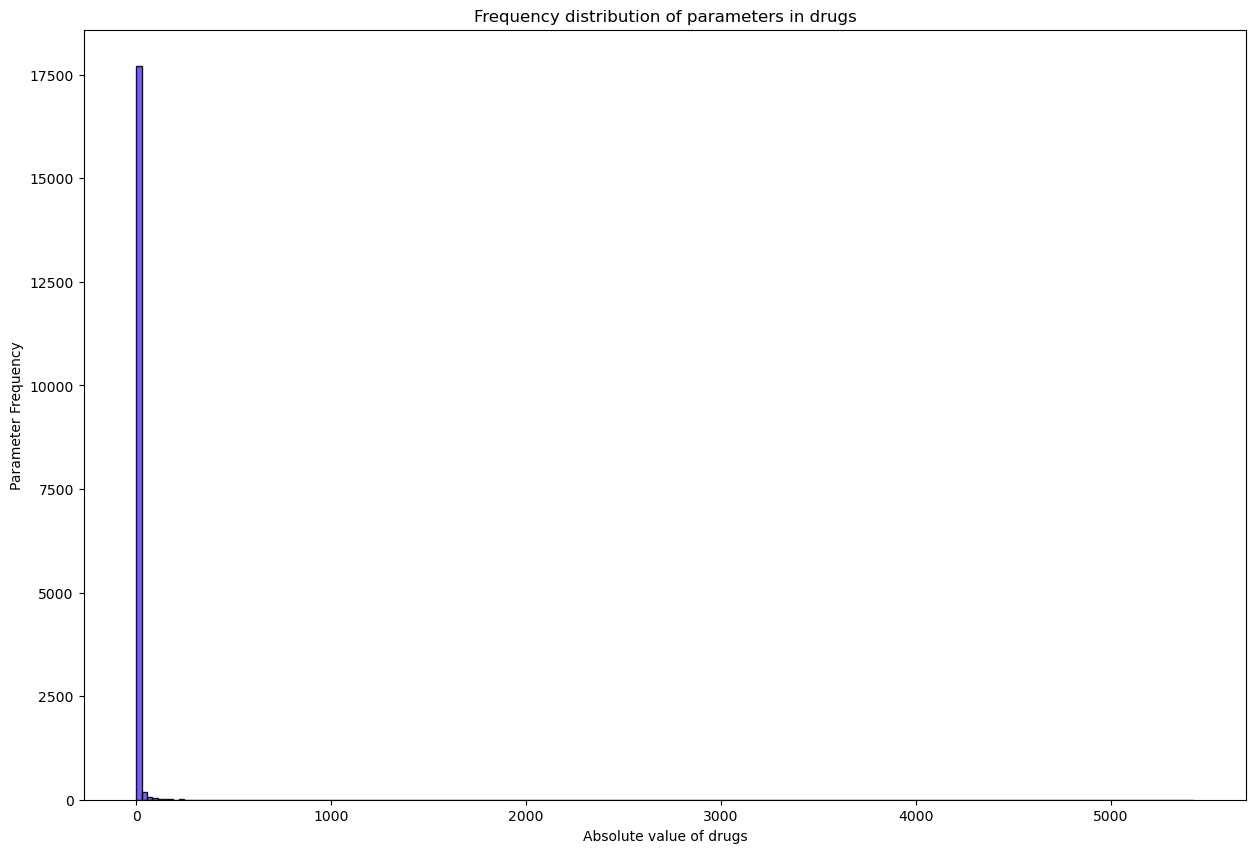

In [47]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(15, 10))
plt.hist(parameter_percentages.values, bins=200, edgecolor='black', alpha=0.9, color='#6C4AF8')

# Configurar títulos y etiquetas
plt.title('Frequency distribution of parameters in drugs')
plt.xlabel('Absolute value of drugs')
plt.ylabel('Parameter Frequency')

# Mostrar el histograma
plt.show()



In [27]:
import plotly.express as px

# Crear una figura interactiva con Plotly
fig = px.histogram(parameter_percentages.values, nbins=1000,
                   title='Distribución de Porcentajes',
                   labels={'value': 'Porcentaje', 'count': 'Frecuencia'})

# Mostrar la figura interactiva
fig.show()


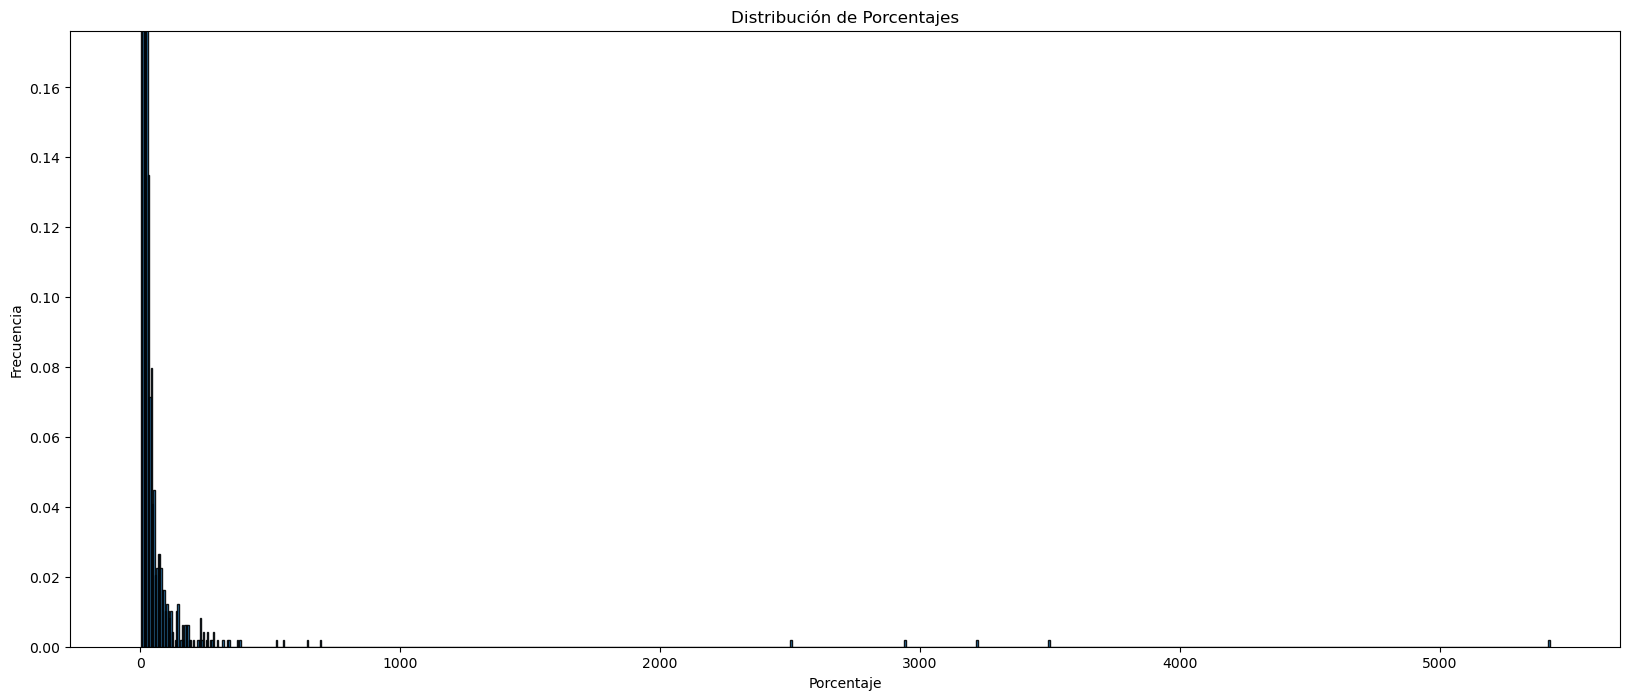

In [28]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(20, 8))
n, bins, patches = plt.hist(parameter_percentages.values, bins=1000, edgecolor='black', alpha=0.9, density=True)

# Ajustar la altura de las barras para que se vean más pronunciadas
for patch in patches:
    patch.set_height(patch.get_height() * 200)  # Puedes ajustar el valor para controlar la altura

# Configurar títulos y etiquetas
plt.title('Distribución de Porcentajes')
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


In [37]:
len(parameter_groups)

4375

In [9]:
unique_parameters

NameError: name 'unique_parameters' is not defined

In [29]:
def analyze_table_for_synonym_groups(table_name, synonym_groups):
    """
    Analyze a table (drug) for the presence of synonym groups in its parameter columns.

    This function takes a table name and a dictionary of synonym groups as input and analyzes the table to determine
    if any of its parameter columns contain parameters that belong to a synonym group.

    Parameters:
    table_name (str): The name of the table (drug) to analyze.
    synonym_groups (dict): A dictionary of synonym groups where keys are group names and values are sets of synonyms.

    Returns:
    list: A list of group names to which the table's parameters belong.
    """
    # Connect to the SQLite database
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Query to retrieve the parameter columns from the table
    columns_query = f"""PRAGMA table_info("{table_name}")"""
    cursor.execute(columns_query)
    column_info = cursor.fetchall()

    groups_found = set()

    # Iterate through the columns and check for synonym groups in parameter columns
    for col_info in column_info:
        col_name = col_info[1]
        if col_name.startswith("Parameter"):
            query = f"""SELECT {col_name} FROM "{table_name}" """
            df = pd.read_sql_query(query, conn)
            for value in df[col_name]:
                normalized_value = normalize_parameter_name(value)
                for group_name, synonyms in synonym_groups.items():
                    if normalized_value in synonyms:
                        groups_found.add(group_name)

    # Close the database connection
    conn.close()

    return list(groups_found)

def analyze_tables_for_synonym_groups(db_file, synonym_groups):
    """
    Analyze all tables (drugs) in the database for the presence of synonym groups in their parameter columns.

    This function connects to an SQLite database specified by the 'db_file' parameter and analyzes each table to determine
    if any of its parameter columns contain parameters that belong to a synonym group. It then calculates the percentage
    of drugs that have at least one column with a synonym group and the percentage of drugs that do not.

    Parameters:
    db_file (str): The path to the SQLite database file.
    synonym_groups (dict): A dictionary of synonym groups where keys are group names and values are sets of synonyms.

    Returns:
    float: Percentage of drugs that have at least one column with a synonym group.
    float: Percentage of drugs that do not have any column with a synonym group.
    dict: A dictionary where keys are group names and values are the number of drugs that belong to that group.
    """
    # Connect to the SQLite database
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Get the names of all tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_names = cursor.fetchall()

    # Initialize counters
    drugs_with_group_column = 0
    drugs_without_group_column = 0
    group_drug_counts = {group_name: 0 for group_name in synonym_groups.keys()}

    # Iterate through each table and analyze for synonym groups
    for table in table_names:
        table_name = table[0]
        groups_found = analyze_table_for_synonym_groups(table_name, synonym_groups)
        if groups_found:
            drugs_with_group_column += 1
            for group in groups_found:
                group_drug_counts[group] += 1
        else:
            drugs_without_group_column += 1

    # Calculate percentages
    total_drugs = len(table_names)
    percentage_with_group_column = (drugs_with_group_column / total_drugs) * 100
    percentage_without_group_column = (drugs_without_group_column / total_drugs) * 100

    # Close the database connection
    conn.close()

    return percentage_with_group_column, percentage_without_group_column, group_drug_counts

if __name__ == "__main__":
    # Specify the path to the SQLite database file
    db_file = "DRUG_DB.db"  # Replace with the path to your SQLite database

    # Define your synonym groups
  

    # Analyze tables for synonym groups
    with_group, without_group, group_drug_counts = analyze_tables_for_synonym_groups(db_file, synonym_groups)

    # Print results
    print(f"Percentage of drugs with at least one column with a synonym group: {with_group}%")
    print(f"Percentage of drugs without any column with a synonym group: {without_group}%")
    print("Number of drugs in each synonym group:")
    for group, count in group_drug_counts.items():
        print(f"{group}: {count}")


Percentage of drugs with at least one column with a synonym group: 94.48160535117057%
Percentage of drugs without any column with a synonym group: 5.518394648829431%
Number of drugs in each synonym group:
halflife: 1057
cmax: 891
timetocmax: 344
cssmax: 182
auc: 809
clearance: 866
bioavailability: 840
maximaltolerateddose: 126


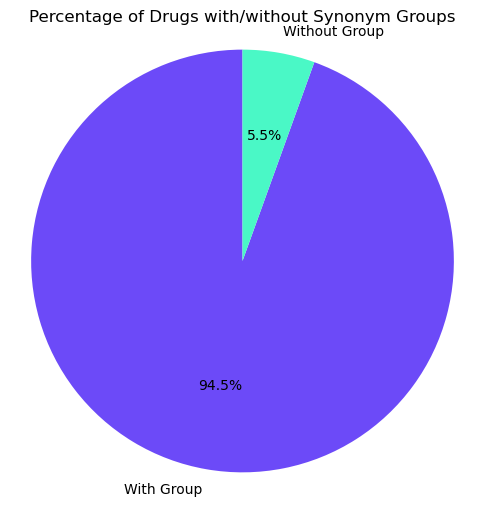

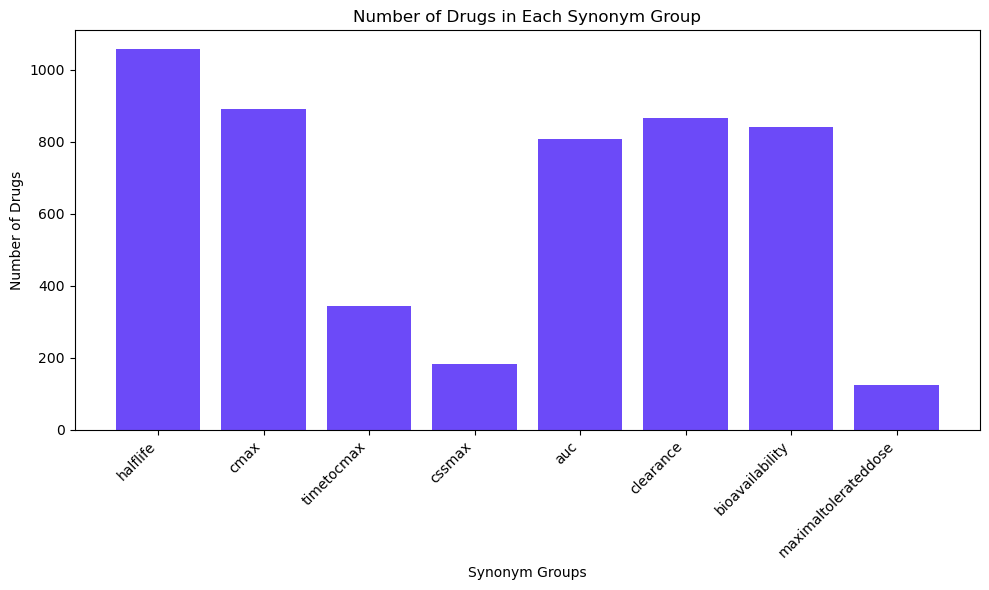

In [38]:
import matplotlib.pyplot as plt



# Pie chart for the percentage of drugs with and without synonym groups
labels = ['With Group', 'Without Group']
sizes = [with_group, without_group]
colors = ['#6C4AF8', '#4AF8C6']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Drugs with/without Synonym Groups')
plt.axis('equal')  # To make the chart a circle.
plt.show()

# Bar chart for the number of drugs in each synonym group
groups = list(group_drug_counts.keys())
counts = list(group_drug_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(groups, counts, color='#6C4AF8')
plt.xlabel('Synonym Groups')
plt.ylabel('Number of Drugs')
plt.title('Number of Drugs in Each Synonym Group')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


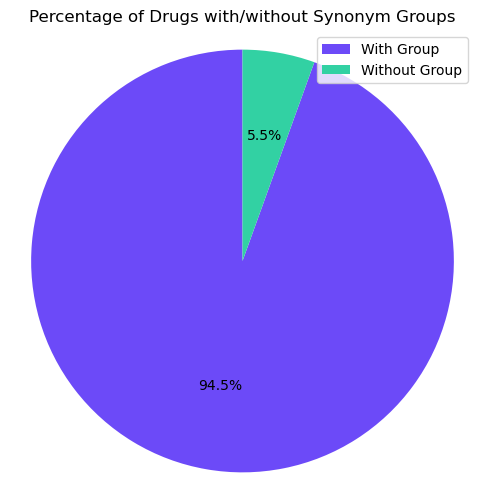

In [40]:
import matplotlib.pyplot as plt

# Datos para graficar
with_group_percentage = 60.5  # Reemplaza con el porcentaje real
without_group_percentage = 39.5  # Reemplaza con el porcentaje real

# Gráfico de pastel para el porcentaje de drogas con y sin grupos de sinónimos
labels = ['With Group', 'Without Group']
sizes = [with_group, without_group]
colors = ['#6C4AF8', '#32D1A3']
plt.figure(figsize=(6, 6))
plt.pie(sizes,  colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Drugs with/without Synonym Groups')
plt.axis('equal')  # Para hacer que el gráfico sea un círculo.

# Leyenda en lugar de etiquetas
plt.legend(labels, loc='best')
plt.show()
